In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

In [18]:
# Loads in all the data from the master data folder
data_path  = 'data\master_data'
data_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
data       = [np.loadtxt(os.path.join(data_path, file), delimiter=',') for file in data_files]

dark    = data[0]
beam    = data[1]
ambient = data[2]

In [28]:
# Gets the cleaned beam data and the coordinate variables
# cleaned_beam = (beam - ambient) - dark # Subtracted
cleaned_beam = beam  # Un-subtracted

dim_y, dim_x = cleaned_beam.shape
x_pix = np.linspace(0,10, dim_x)
y_pix = np.linspace(0,10, dim_y)

dx = 6.45 # micrometers
dy = dx
x_coords = x_pix * dx
y_coords = y_pix * dy

In [46]:
y_coords

array([ 0.        ,  0.1701847 ,  0.34036939,  0.51055409,  0.68073879,
        0.85092348,  1.02110818,  1.19129288,  1.36147757,  1.53166227,
        1.70184697,  1.87203166,  2.04221636,  2.21240106,  2.38258575,
        2.55277045,  2.72295515,  2.89313984,  3.06332454,  3.23350923,
        3.40369393,  3.57387863,  3.74406332,  3.91424802,  4.08443272,
        4.25461741,  4.42480211,  4.59498681,  4.7651715 ,  4.9353562 ,
        5.1055409 ,  5.27572559,  5.44591029,  5.61609499,  5.78627968,
        5.95646438,  6.12664908,  6.29683377,  6.46701847,  6.63720317,
        6.80738786,  6.97757256,  7.14775726,  7.31794195,  7.48812665,
        7.65831135,  7.82849604,  7.99868074,  8.16886544,  8.33905013,
        8.50923483,  8.67941953,  8.84960422,  9.01978892,  9.18997361,
        9.36015831,  9.53034301,  9.7005277 ,  9.8707124 , 10.0408971 ,
       10.21108179, 10.38126649, 10.55145119, 10.72163588, 10.89182058,
       11.06200528, 11.23218997, 11.40237467, 11.57255937, 11.74

In [47]:
np.where(y_coords >= 32.33509235)

(array([191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
        204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
        217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
        230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
        243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
        256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
        269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
        282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
        295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
        308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
        321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,
        334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346,
        347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359,
        360, 361, 362, 363, 364, 365, 366, 367, 368

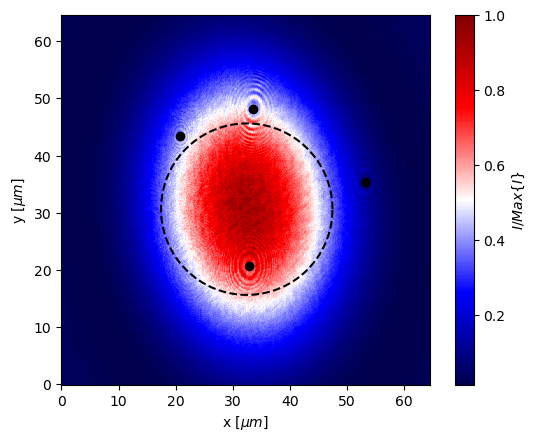

In [112]:
# Plots the master dark
cmap =  'seismic'
fig,ax = plt.subplots()
ax.pcolormesh(x_coords, y_coords, cleaned_beam / np.max(cleaned_beam), label='cleaned beam', cmap = cmap)
ax.set_xlabel('x $[\mu m]$')
ax.set_ylabel('y [$\mu m$]')

# Sets a colourbar
cbar = plt.colorbar(ax.pcolormesh(x_coords, y_coords, cleaned_beam / np.max(cleaned_beam), cmap = cmap))
# cbar = plt.colorbar(ax.pcolormesh(master_dark, cmap = 'hot'))
cbar.set_label('$I/Max\{I\}$')
ax.set_aspect('equal')

# Sets the middle of the plot
ix = 265
iy = 180
x_center = x_coords[ix]
y_center = y_coords[iy]
# ax.axvline(x_center, color='k', linestyle='--')
# ax.axhline(y_center, color='k', linestyle='--')

# Plots a circle around the chosen center
R = 15
theta = np.linspace(0,2*np.pi,1000)
x_circ = x_center + R*np.cos(theta)
y_circ = y_center + R*np.sin(theta)
ax.plot(x_circ, y_circ, 'k--')

# Plots points at the center of each dust
# particle diffraction pattern
# particle 1
i1x = x_coords[274]
i1y = y_coords[283]
ax.plot(i1x, i1y, 'ko')

# # particle 2
i2x = x_coords[268]
i2y = y_coords[122]
ax.plot(i2x,i2y, 'ko')

# # particle 3
i3x = x_coords[170]
i3y = y_coords[255]
ax.plot(i3x,i3y, 'ko')

# # particle 4
i3x = x_coords[434]
i3y = y_coords[208]
ax.plot(i3x,i3y, 'ko')

In [56]:
# Defies a gaussian function
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Defines a sinc function
def sinc(x, a, b):
    return(a * np.sin(b*x)/x)

In [57]:
# Gets the x and y profiles of the beam
x_profile = cleaned_beam[iy, :]
y_profile = cleaned_beam[:, ix]

# Fits a gaussian to the x and y profiles
x_model = curve_fit(gaussian, x_coords, x_profile)
y_model = curve_fit(gaussian, y_coords, y_profile)

# Calculates the fits
x_fit = gaussian(x_coords, *x_model[0])
y_fit = gaussian(y_coords, *y_model[0])

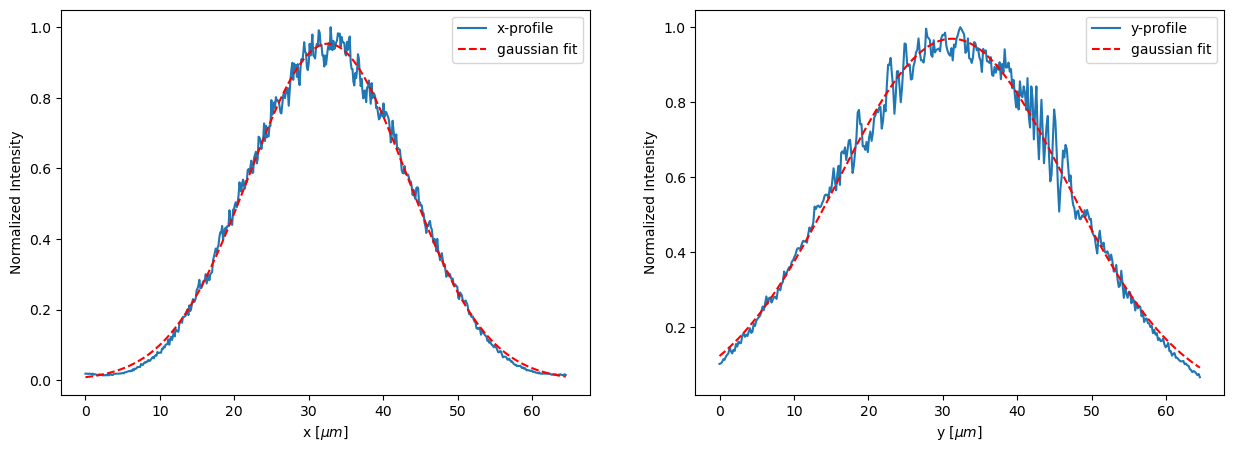

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
# X-profile
ax1.plot(x_coords, x_profile / np.max(x_profile), label='x-profile')
ax1.set_xlabel('x [$\mu m$]')
ax1.set_ylabel('Normalized Intensity')
ax1.plot(x_coords, x_fit / np.max(x_profile), 'r--', label='gaussian fit')
ax1.legend()
# ax1.set_aspect('equal')

# Y-profile
ax2.plot(y_coords, y_profile / np.max(y_profile), label='y-profile')
ax2.set_xlabel('y [$\mu m$]')
ax2.set_ylabel('Normalized Intensity')
ax2.plot(y_coords, y_fit / np.max(y_profile), 'r--', label='gaussian fit')
ax2.legend()
# ax2.set_aspect('equal')

plt.show()

## Looks at fitting the first dust speck with a funnction (to be determined which)

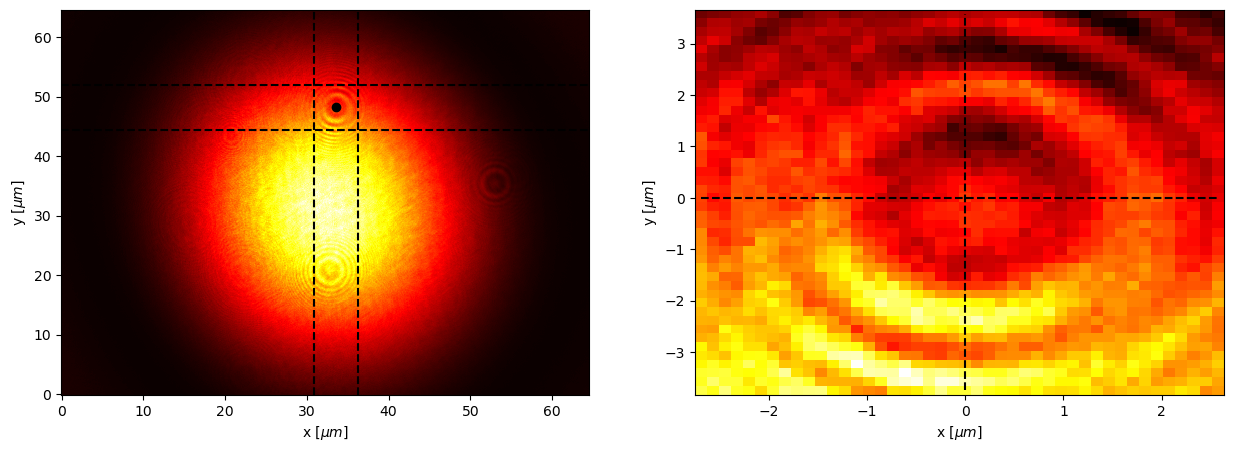

In [113]:
# Plots the master dark
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

## PLot 1: Total Picture
ax1.pcolormesh(x_coords, y_coords, cleaned_beam / np.max(cleaned_beam), label='cleaned beam', cmap = 'hot')
ax1.set_xlabel('x [$\mu m$]')
ax1.set_ylabel('y [$\mu m$]')

# Sets a colourbar
cbar = plt.colorbar(ax.pcolormesh(x_coords, y_coords, cleaned_beam / np.max(cleaned_beam), cmap = 'seismic'))
# cbar = plt.colorbar(ax.pcolormesh(master_dark, cmap = 'hot'))
cbar.set_label('$I/Max\{I\}$')
# ax1.set_aspect('equal')

# Plots a box around the point of interest
i1x = 274
i1y = 283
ax1.plot(x_coords[i1x], y_coords[i1y], 'ko')
d = 22
x_start = i1x - d; x_end = i1x + d
y_start = i1y - d ; y_end   = i1y + d
ax1.axvline(x_coords[x_start], color='k', linestyle='--')
ax1.axvline(x_coords[x_end], color='k', linestyle='--')
ax1.axhline(y_coords[y_start], color='k', linestyle='--')
ax1.axhline(y_coords[y_end], color='k', linestyle='--')


# Plot 2: Zoomed in picture
# Shifts the coordinates to be centered around the middle of the airy disk
x_shift = x_coords[x_start:x_end] - x_coords[i1x]
y_shift = y_coords[y_start:y_end] - y_coords[i1y]

ax2.pcolormesh(x_shift, y_shift, cleaned_beam[y_start:y_end, x_start:x_end] / np.max(cleaned_beam), label='cleaned beam', cmap = 'hot')
ax2.set_xlabel('x [$\mu m$]')
ax2.set_ylabel('y [$\mu m$]')
cbar = plt.colorbar(ax.pcolormesh(x_shift, y_shift, cleaned_beam[y_start:y_end, x_start:x_end] / np.max(cleaned_beam), cmap = 'hot'))
cbar.set_label('$I/Max\{I\}$')

# Plots lines on the 2nd plot to show plot belows region
ax2.vlines(0, np.min(y_shift), np.max(y_shift), color = 'k', linestyle='--')
ax2.hlines(0, np.min(x_shift), np.max(x_shift), color = 'k', linestyle='--')

In [60]:
# Gets the zoomed in data normalized to the total max intensity
x_profile = cleaned_beam[i1y, x_start:x_end] / np.max(cleaned_beam)
y_profile = cleaned_beam[y_start:y_end,i1x] / np.max(cleaned_beam)

# Fits a sinc function to eachh profile
# poptx, pcovx = curve_fit(sinc, np.arange(len(x_profile)), x_profile)

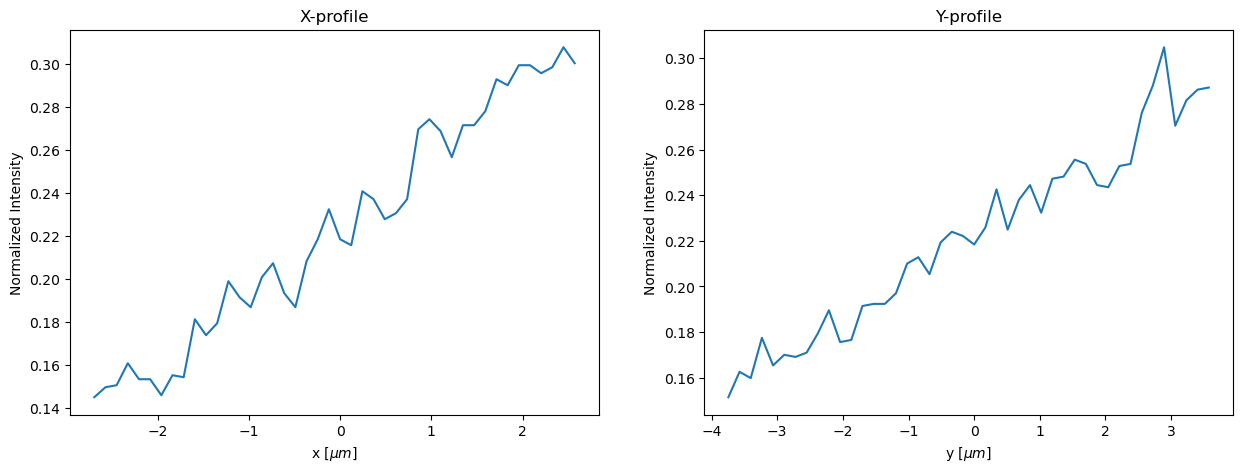

In [61]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
# X-profile
ax1.plot(x_shift, x_profile, label='x-profile')
ax1.set_xlabel('x [$\mu m$]')
ax1.set_ylabel('Normalized Intensity')
ax1.set_title('X-profile')

# Y-profile
ax2.plot(y_shift, y_profile, label='y-profile')
ax2.set_xlabel('y [$\mu m$]')
ax2.set_ylabel('Normalized Intensity')
ax2.set_title('Y-profile')

plt.show()


Fit proper function to the data
$$
    I_x = \frac{1}{(1-\epsilon^2)^2}\left[
        \left(\frac{2J_1(\pi x)}{\pi x}\right)^2 - 
        \epsilon^2\left(\frac{2J_1(\pi \epsilon x)}{\pi \epsilon x}\right)^2
    \right]^2
$$
$$
    I_y = \frac{1}{(1-\epsilon^2)^2}\left[
        \left(\frac{2J_1(\pi y)}{\pi y}\right)^2 - 
        \epsilon^2\left(\frac{2J_1(\pi \epsilon y)}{\pi \epsilon y}\right)^2
    \right]^2
$$
Where 
$$
    \epsilon = R/a
$$
$R = $ radius of the dust $a = $ radius of the incoming beam
$$
    x = ka\sin\theta \approx \frac{2\pi a}{\lambda d}
$$
$$
    y = ka\cos\theta \approx \frac{2\pi a}{\lambda d}
$$

Try subtracting off gaussian for attenuation from dust. (more in the center, less towards the edges of the particle)
$$
    I_{tot}^{x_k} = I_0\left(\frac{2J_1(x_k)}{x_k}\right)^2 - 
                    \alpha e^{-\beta(x_k-\gamma)^2}  
$$

In [11]:
# defines a function for the dust
from scipy.special import jv # imports bessel functions
def dust_model(x, A, alpha, beta, gamma):
    term1 = A * (2*jv(1,x)/x)**2
    term2 = alpha * np.exp(-beta*(x-gamma)**2)
    return (term1 - term2)

In [12]:
# Fits the x and y profiles with the function above
fit1x = curve_fit(dust_model, x_shift, x_profile)
fit1y = curve_fit(dust_model, y_shift, y_profile)

# calculates the model data
modx1 = dust_model(x_shift, *fit1x[0])

mody1 = dust_model(y_shift, *fit1y[0])

C:\Users\jatki\AppData\Local\Temp\ipykernel_14264\3964302971.py:4: RuntimeWarning: invalid value encountered in divide
  term1 = A * (2*jv(1,x)/x)**2


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

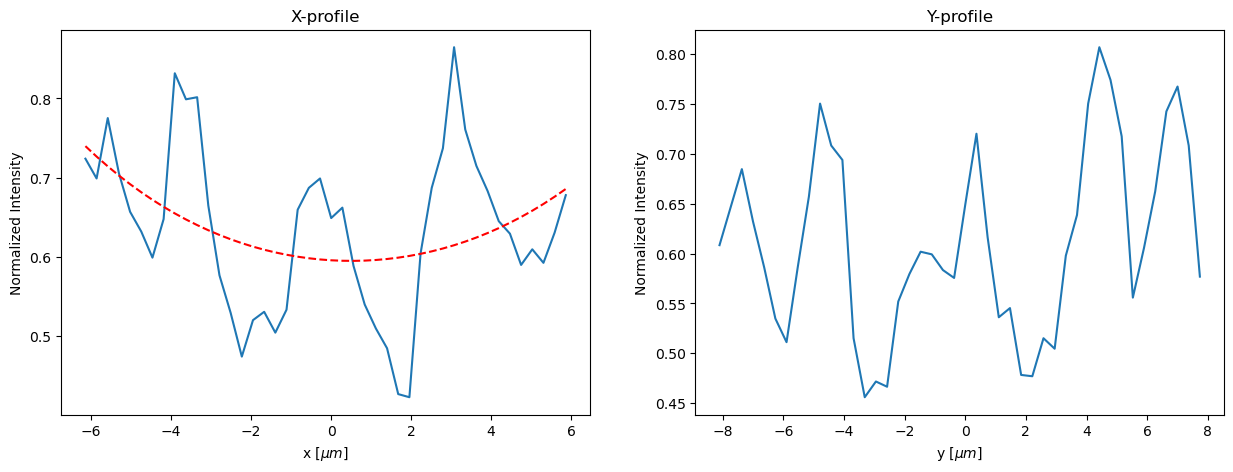

In [161]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
# X-profile
ax1.plot(x_shift, x_profile, label='x-profile')
ax1.plot(x_shift, modx1, 'r--', label='fit')
ax1.set_xlabel('x [$\mu m$]')
ax1.set_ylabel('Normalized Intensity')
ax1.set_title('X-profile')

# Y-profile
ax2.plot(y_shift, y_profile, label='y-profile')
ax2.set_xlabel('y [$\mu m$]')
ax2.set_ylabel('Normalized Intensity')
ax2.set_title('Y-profile')

plt.show()